In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx',  sheet_name='Data')

In [4]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### Assess dataset

In [5]:
df.shape

(5000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


> The dataset columns are all in numeric datatypes

In [7]:
sum(df.duplicated())

0

> no duplicate values in the dataset

In [8]:
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

> The dataset has no missing values

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


> The dataset distribution except inome column whose 75% percentile is 98 and its max is at 224 its a wide range, aslo CCAvg column which its 75% is at 2.5 and max ata 10 this range is wide also, Mortgage also has a wide range 75% = 101, and max = 635.<br>
> Experience has a negative value, the min is -3, this is data quality issues.

### Data cleaning

#### Convert negative experience years to positive values

In [10]:
# use abs()
df['Experience'] = df['Experience'].apply(abs)

In [11]:
df[df['Experience'] < 0]['Experience'].count()

0

## EDA
### Age

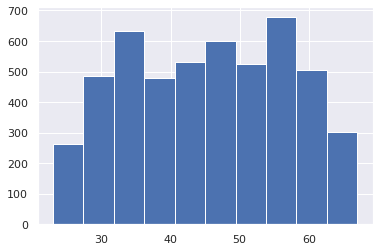

In [12]:
df.Age.hist();

### Experience

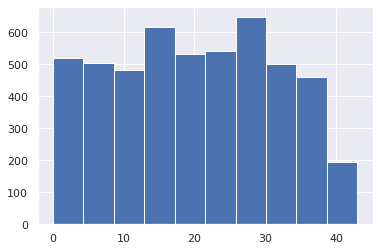

In [13]:
df.Experience.hist()

### Income

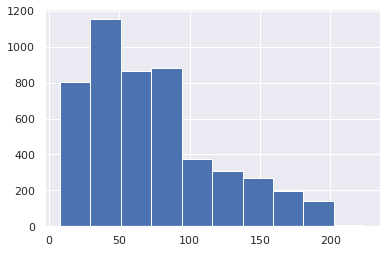

In [14]:
df.Income.hist();

> Income column has a right-skewed data distribution

### CCAvg

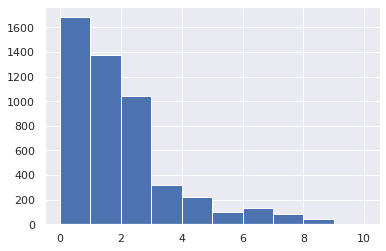

In [15]:
df.CCAvg.hist()

> CCAvg column is skewed to the right, i.e many people seems to spend less, and few people spend highly on monthly basis

### Family

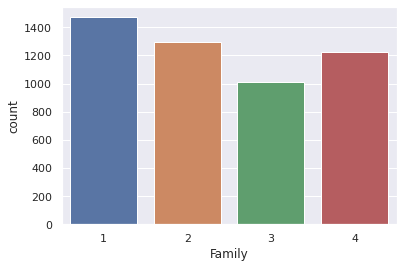

In [16]:
sns.countplot(x='Family', data=df)
plt.show()

### Education

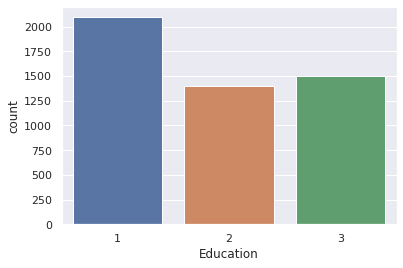

In [17]:
sns.countplot(x='Education', data=df)
plt.show()

### Mortage

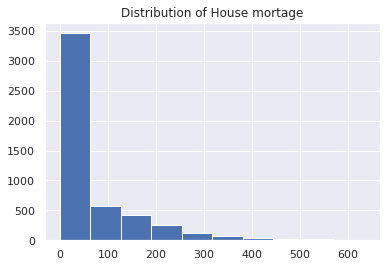

In [18]:
df.Mortgage.hist();
plt.title("Distribution of House mortage")
plt.show()

### Personal Loan(target column)

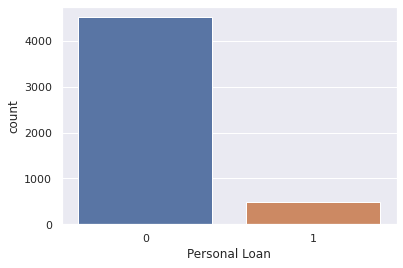

In [19]:
sns.countplot(x='Personal Loan', data=df)

In [20]:
df['Personal Loan'].value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

> The target column is quite imabalance, those whos didn't accept the loan have a higher proportion of 0,904 while the other class has a proportion of 0.096, quite an imbalance.

### Securities Account

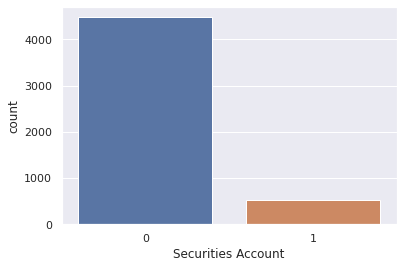

In [21]:
sns.countplot(x='Securities Account', data=df)

### CD Account

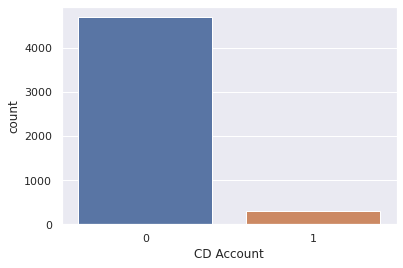

In [22]:
sns.countplot(x='CD Account', data=df)

### Online

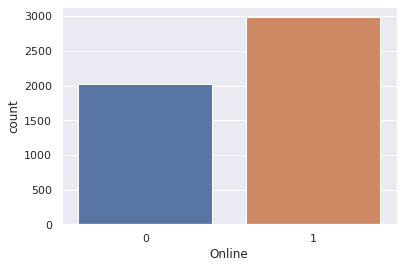

In [23]:
sns.countplot(x='Online', data=df)

### CreditCard

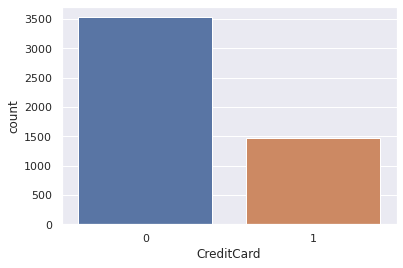

In [24]:
sns.countplot(x='CreditCard', data=df)

### multivariate analysis

### Age vs Experience

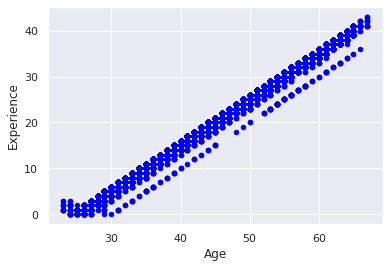

In [54]:
df.plot(x="Age", y="Experience", kind="scatter", color="blue");

### Age vs Mortgage

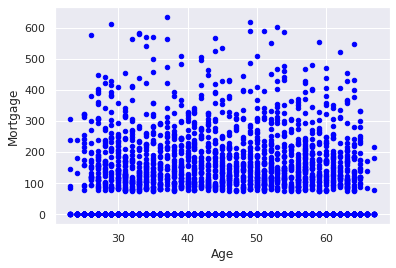

In [55]:
df.plot(x="Age", y="Mortgage", kind="scatter", color='blue');

### Experience vs Income

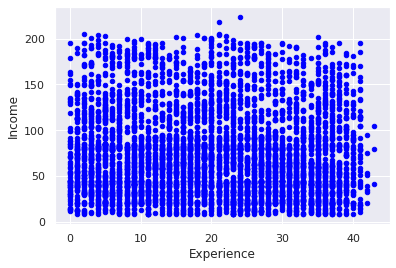

In [27]:
df.plot(x="Experience", y="Income", kind="scatter", color="blue");

### Age vs Income

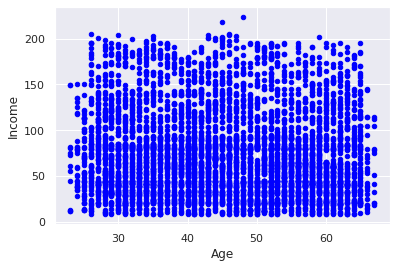

In [28]:
df.plot(x="Age", y="Income", kind="scatter", color="blue");

### Family vs personal loan

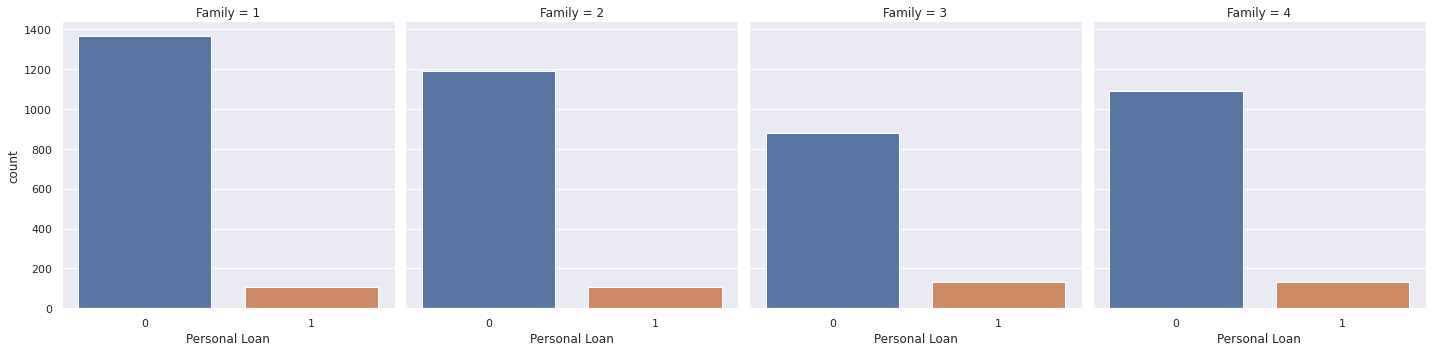

In [29]:
sns.catplot(x='Personal Loan', col='Family', kind='count', data=df);

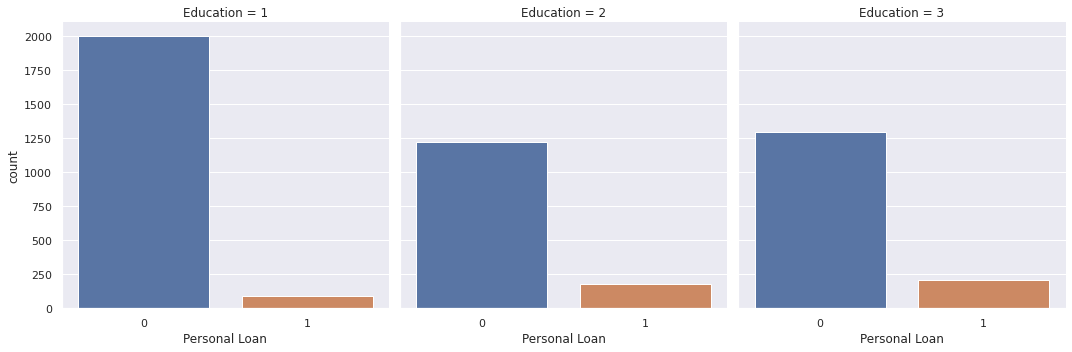

In [30]:
sns.catplot(x='Personal Loan', col='Education', kind='count', data=df);

### Securities Account vs Personal Loan

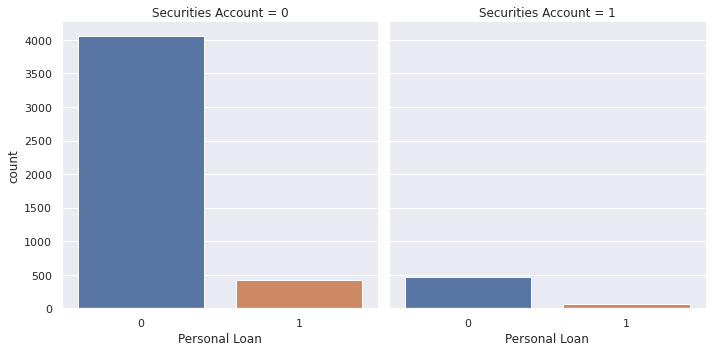

In [31]:
sns.catplot(x='Personal Loan', col='Securities Account', kind='count', data=df);

> Those wit

### CreditCard vs Personal Loan

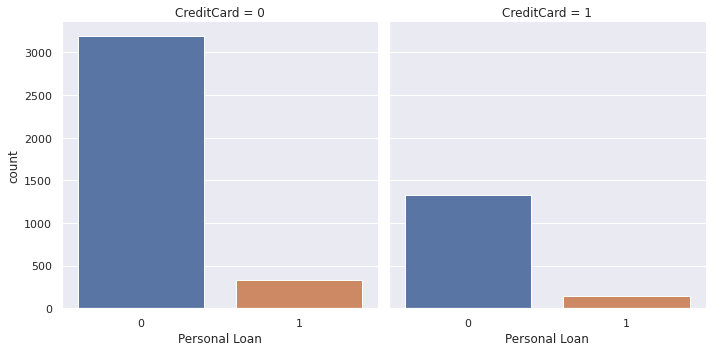

In [32]:
sns.catplot(x='Personal Loan', col='CreditCard', kind='count', data=df);

In [33]:
### Multivariate analysis on continuous values

### Personal Loan vs Experience

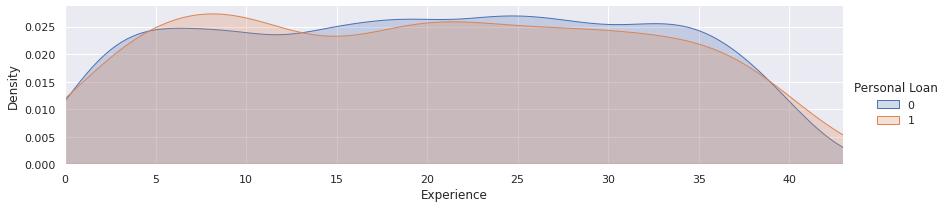

In [34]:
# plot distributions of personal Loan vs Experience
age = sns.FacetGrid( df, hue = 'Personal Loan', aspect=4 )
age.map(sns.kdeplot, 'Experience', shade= True )
age.set(xlim=(0 , df['Experience'].max()))
age.add_legend();

### Income vs Personal Loan

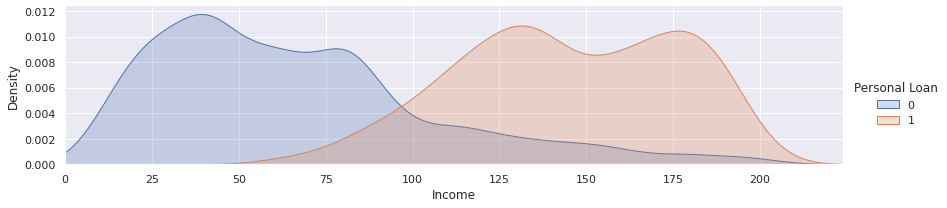

In [35]:
# plot distributions of personal Loan vs Income
age = sns.FacetGrid( df, hue = 'Personal Loan', aspect=4 )
age.map(sns.kdeplot, 'Income', shade= True )
age.set(xlim=(0 , df['Income'].max()))
age.add_legend();

### CCAvg vs Personal Loan

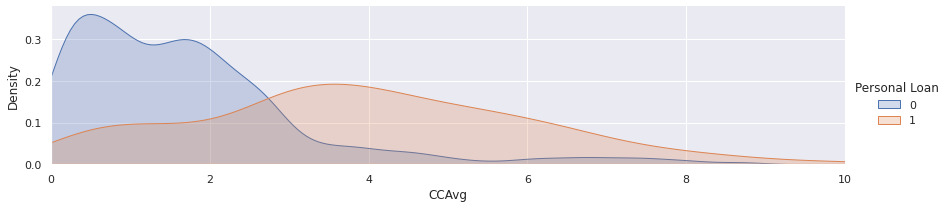

In [36]:
# plot distributions of personal Loan vs Income
age = sns.FacetGrid( df, hue = 'Personal Loan', aspect=4 )
age.map(sns.kdeplot, 'CCAvg', shade= True )
age.set(xlim=(0 , df['CCAvg'].max()))
age.add_legend();

### Mortgage vs Personal Loan

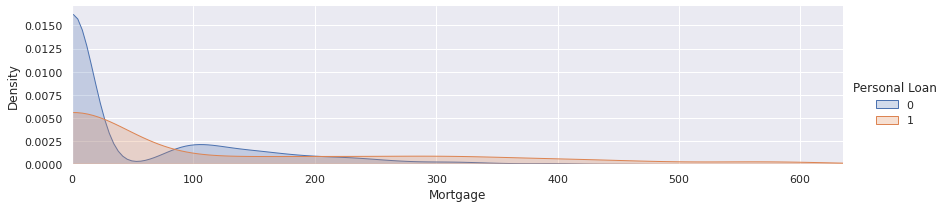

In [37]:
# plot distributions of personal Loan vs Income
age = sns.FacetGrid( df, hue = 'Personal Loan', aspect=4 )
age.map(sns.kdeplot, 'Mortgage', shade= True )
age.set(xlim=(0 , df['Mortgage'].max()))
age.add_legend();

### Correlation

In [38]:
df.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008202,-0.017695,0.013432,-0.016797,-0.024672,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.993991,-0.055269,-0.029216,-0.046418,-0.052030,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008202,0.993991,1.000000,-0.046876,-0.028936,-0.051851,-0.049750,0.013919,-0.011097,-0.008304,-0.000989,0.009735,0.014051,0.008851
Income,-0.017695,-0.055269,-0.046876,1.000000,-0.016410,-0.157501,0.645993,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028936,-0.016410,1.000000,0.011778,-0.004068,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.051851,-0.157501,0.011778,1.000000,-0.109285,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024672,-0.052030,-0.049750,0.645993,-0.004068,-0.109285,1.000000,-0.136138,0.109909,0.366891,0.015087,0.136537,-0.003620,-0.006686
Education,0.021463,0.041334,0.013919,-0.187524,-0.017377,0.064929,-0.136138,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.011097,0.206806,0.007383,-0.020445,0.109909,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.008304,0.502462,0.000107,0.061367,0.366891,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


In [39]:
corr_matrix = df.corr()

corr_matrix["Personal Loan"].sort_values(ascending=False)

Personal Loan         1.000000
Income                0.502462
CCAvg                 0.366891
CD Account            0.316355
Mortgage              0.142095
Education             0.136722
Family                0.061367
Securities Account    0.021954
Online                0.006278
CreditCard            0.002802
ZIP Code              0.000107
Age                  -0.007726
Experience           -0.008304
ID                   -0.024801
Name: Personal Loan, dtype: float64

### Dataset heatmap

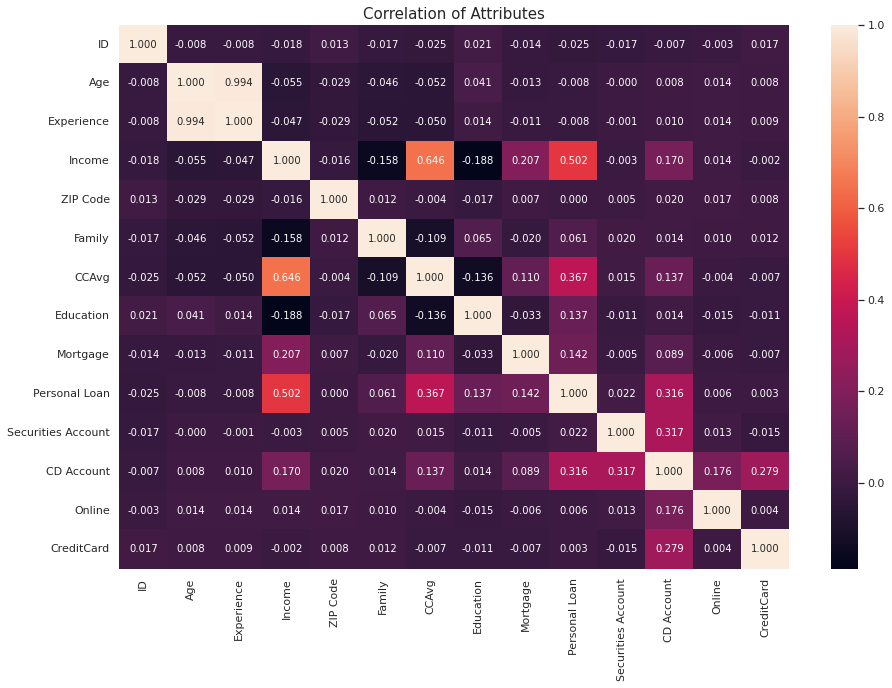

In [40]:
plt.figure(figsize=(15,10))
plt.title('Correlation of Attributes', size=15)
sns.heatmap(corr_matrix, annot=True, fmt='.3f');

## modelling

In [41]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [42]:
# drop Unuseful column for moelling
df.drop(['ID', 'ZIP Code'], axis=1, inplace=True)

### Separating data into X and y variables

In [43]:
X = df.drop('Personal Loan', axis=1)
y = df['Personal Loan']

In [44]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

In [45]:
X_train.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
3169,52,28,55,1,1.6,2,227,0,0,0,0
3122,38,14,54,2,0.6,3,218,0,0,0,0
708,35,10,21,3,1.3,1,115,0,0,0,0
4099,61,35,60,1,2.8,2,0,0,0,1,1
4329,59,33,10,4,0.7,3,0,0,0,1,0


In [46]:
y_train.value_counts()

0    3390
1     360
Name: Personal Loan, dtype: int64

In [47]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
train_pred = logreg.predict(X_train)

y_pred = logreg.predict(X_test)

In [48]:
# import the metrics class
from sklearn import metrics

print("Train Accuracy:",metrics.accuracy_score(y_train, train_pred))
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Train Accuracy: 0.9482666666666667
Test Accuracy: 0.9448
Precision: 0.8
Recall: 0.5666666666666667


In [49]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1113,   17],
       [  52,   68]])

In [50]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1130
           1       0.80      0.57      0.66       120

    accuracy                           0.94      1250
   macro avg       0.88      0.78      0.82      1250
weighted avg       0.94      0.94      0.94      1250



In [51]:
y_test.value_counts()

0    1130
1     120
Name: Personal Loan, dtype: int64

### Check for feature importance

In [52]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': logreg.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

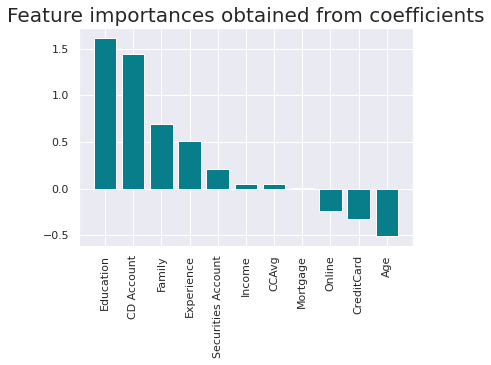

In [53]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [16]:
def simpleArraySum(arr):
    return sum([i for i in arr])

In [17]:
simpleArraySum([1,2,3,4])

10